# This notebook is a submission to Analytics Vidhya's Hacklive 3.

## The challenge:
Researchers have access to large online archives of scientific articles. As a consequence, finding relevant articles has become more and more difficult. Tagging or topic modelling provides a way to give clear token of identification to research articles which facilitates recommendation and search process. 

Earlier on the Independence Day we conducted a Hackathon to predict the topics for each article included in the test set. Continuing with the same problem, In this Live Hackathon we will take one more step ahead and predict the tags associated with the articles.

Given the abstracts for a set of research articles, predict the tags for each article included in the test set. 

Let's first import our libraries :) For machine learning, we might not use all of it but its nice to have.

In [163]:
#Data Analysis
import pandas as pd
import numpy as np
import random as rnd

#Plotting and Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold, train_test_split

Let's open out datasets and see how they look like.

In [179]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
tags = pd.read_csv('tags.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')

In [4]:
display(train.head())
display(test.head())
display(tags.head())

id                                           ABSTRACT  Computer Science  \
0  1824  a ever-growing datasets inside observational a...                 0   
1  3094  we propose the framework considering optimal $...                 1   
2  8463  nanostructures with open shell transition meta...                 0   
3  2082  stars are self-gravitating fluids inside which...                 0   
4  8687  deep neural perception and control networks ar...                 1   

   Mathematics  Physics  Statistics  Analysis of PDEs  Applications  \
0            0        1           0                 0             0   
1            0        0           0                 0             0   
2            0        1           0                 0             0   
3            0        1           0                 0             0   
4            0        0           0                 0             0   

   Artificial Intelligence  Astrophysics of Galaxies  ...  Methodology  \
0                        0                         0  ...            0   
1                        0                         0  ...            0   
2                        0                         0  ...            0   
3                        0                         0  ...            0   
4                        0                         0  ...            0   

   Number Theory  Optimization and Control  Representation Theory  Robotics  \
0              0                         0                      0         0   
1              0                         0                      0         0   
2              0                         0                      0         0   
3              0                         0                      0         0   
4              0                         0                      0         0   

   Social and Information Networks  Statistics Theory  \
0                                0                  0   
1                                0                  0   
2                                0                  0   
3                                0                  0   
4                                0                  0   

   Strongly Correlated Electrons  Superconductivity  Systems and Control  
0                              0                  0                    0  
1                              0                  0                    0  
2                              1                  0                    0  
3                              0                  0                    0  
4                              0                  0                    0  

[5 rows x 31 columns]

id                                           ABSTRACT  Computer Science  \
0   9409  fundamental frequency (f0) approximation from ...                 0   
1  17934  this large-scale study, consisting of 24.5 mil...                 1   
2  16071  we present a stability analysis of the plane c...                 0   
3  16870  we construct finite time blow-up solutions to ...                 0   
4  10496  planetary nebulae (pne) constitute an importan...                 0   

   Mathematics  Physics  Statistics  
0            0        0           1  
1            0        0           1  
2            0        1           0  
3            1        0           0  
4            0        1           0

Tags
0          Analysis of PDEs
1              Applications
2   Artificial Intelligence
3  Astrophysics of Galaxies
4  Computation and Language

In [5]:
train.info()
print ('-'*42)
test.info()
print('-'*42)
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14004 entries, 0 to 14003
Data columns (total 31 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   id                                            14004 non-null  int64 
 1   ABSTRACT                                      14004 non-null  object
 2   Computer Science                              14004 non-null  int64 
 3   Mathematics                                   14004 non-null  int64 
 4   Physics                                       14004 non-null  int64 
 5   Statistics                                    14004 non-null  int64 
 6   Analysis of PDEs                              14004 non-null  int64 
 7   Applications                                  14004 non-null  int64 
 8   Artificial Intelligence                       14004 non-null  int64 
 9   Astrophysics of Galaxies                      14004 non-null  int64 
 10

From this info, we know the following:
1. Since there are no Nan values, so the dataset is complete
2. We have to add the tags columns from the csv file into the test dataset
3. We might have to extract information from the abstract and assign them to the tags based on keywords, and the category of the abstract. We should be using train csv to creat an appropirate model.

Let's start by adding all the tags to our test dataset, iwth a placeholder value of 0. We can always change it later :)

In [6]:
for i in range (len(tags.Tags)):
    test[tags.Tags[i]] = 0
test.head()

id                                           ABSTRACT  Computer Science  \
0   9409  fundamental frequency (f0) approximation from ...                 0   
1  17934  this large-scale study, consisting of 24.5 mil...                 1   
2  16071  we present a stability analysis of the plane c...                 0   
3  16870  we construct finite time blow-up solutions to ...                 0   
4  10496  planetary nebulae (pne) constitute an importan...                 0   

   Mathematics  Physics  Statistics  Analysis of PDEs  Applications  \
0            0        0           1                 0             0   
1            0        0           1                 0             0   
2            0        1           0                 0             0   
3            1        0           0                 0             0   
4            0        1           0                 0             0   

   Artificial Intelligence  Astrophysics of Galaxies  ...  Methodology  \
0                        0                         0  ...            0   
1                        0                         0  ...            0   
2                        0                         0  ...            0   
3                        0                         0  ...            0   
4                        0                         0  ...            0   

   Number Theory  Optimization and Control  Representation Theory  Robotics  \
0              0                         0                      0         0   
1              0                         0                      0         0   
2              0                         0                      0         0   
3              0                         0                      0         0   
4              0                         0                      0         0   

   Social and Information Networks  Statistics Theory  \
0                                0                  0   
1                                0                  0   
2                                0                  0   
3                                0                  0   
4                                0                  0   

   Strongly Correlated Electrons  Superconductivity  Systems and Control  
0                              0                  0                    0  
1                              0                  0                    0  
2                              0                  0                    0  
3                              0                  0                    0  
4                              0                  0                    0  

[5 rows x 31 columns]

For the train dataset, let's try to see which words pop up the most per subject (Computer Science, Math, Physics, Stats)

In [41]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['inside']), random_state = 42)

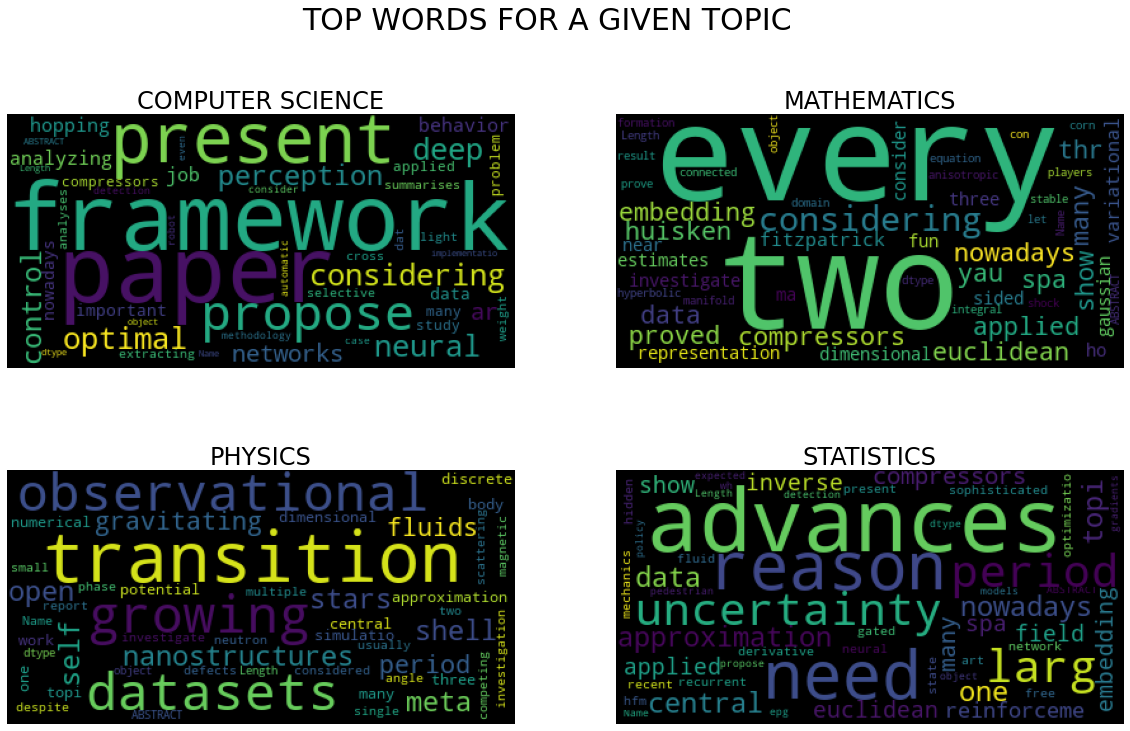

In [63]:
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(['Computer Science', 'Mathematics', 'Physics', 'Statistics']):
    sub_topic = train[train[sub_topic_name] == 1]
    op = wc.generate(str(sub_topic['ABSTRACT']))
    _ = axes[i].imshow(op)
    _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
    _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN TOPIC', fontsize=30)

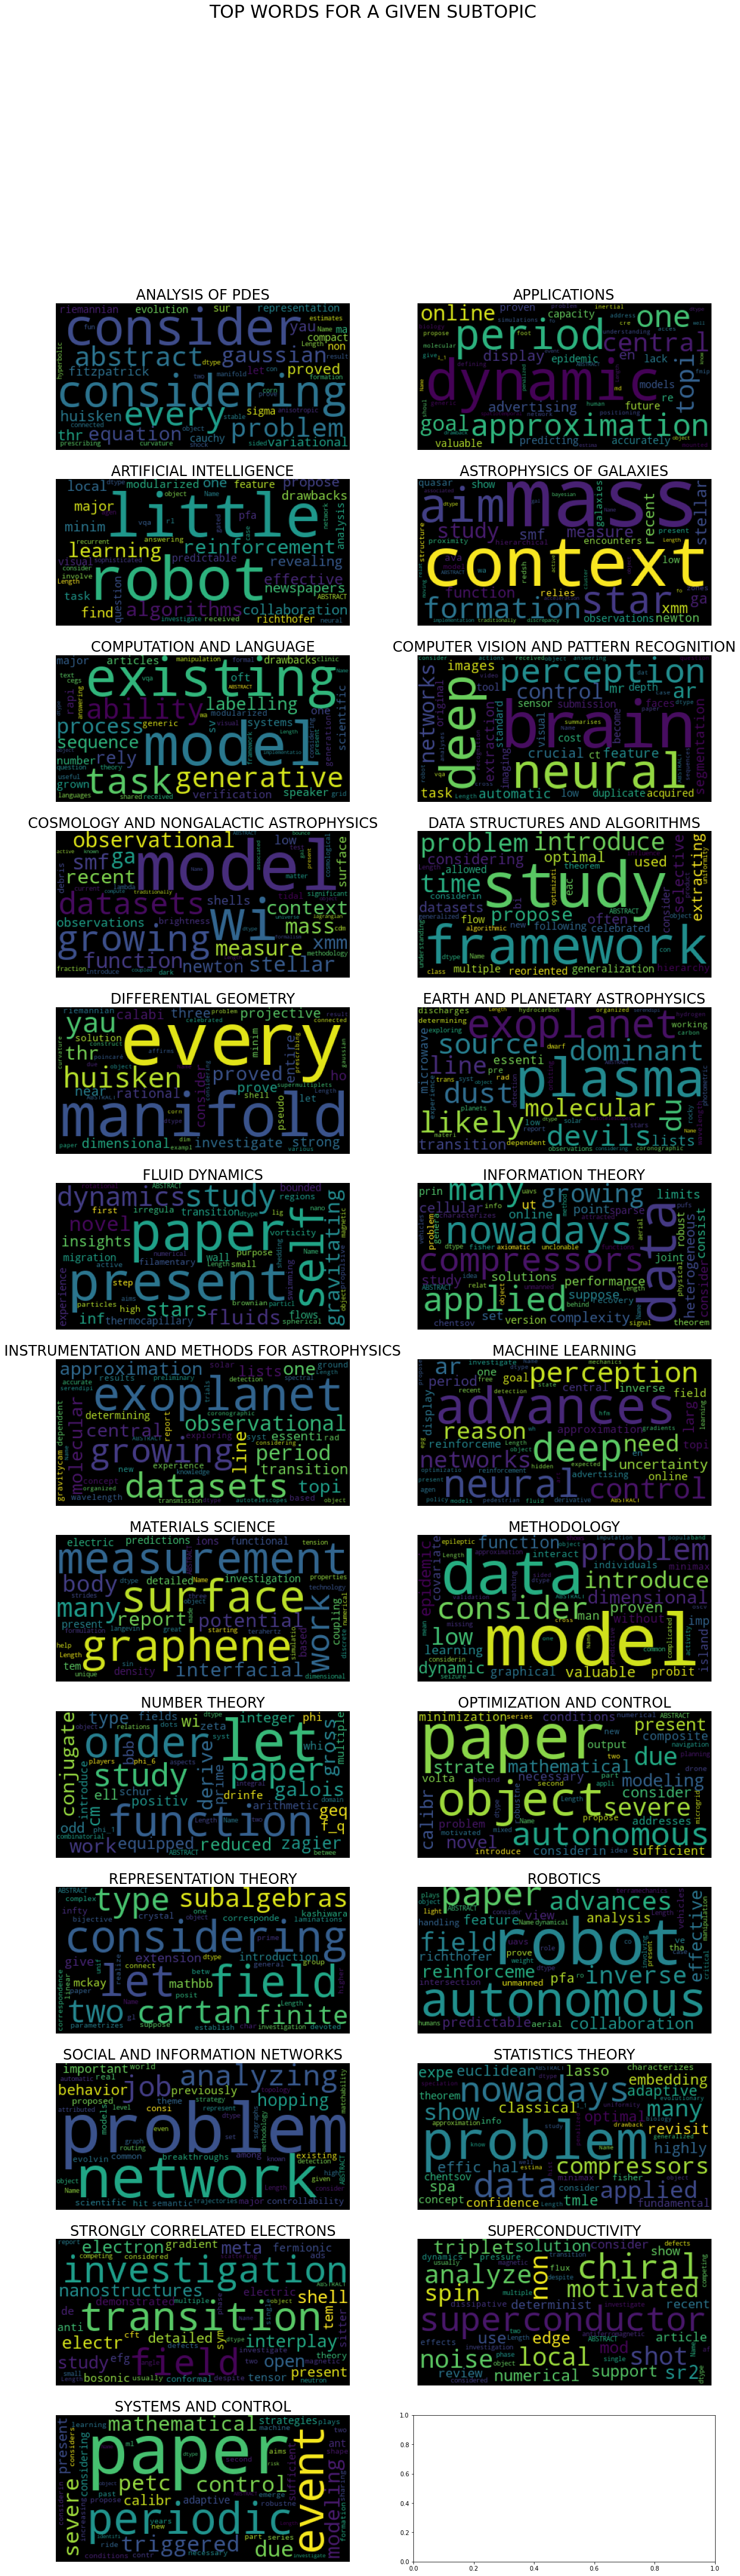

In [79]:
fig, axes = plt.subplots(13, 2, figsize=(20, 70))
axes = [ax for axes_row in axes for ax in axes_row]
for i, sub_topic_name in enumerate(tags.Tags):
    sub_topic = train[train[sub_topic_name] == 1]
    op = wc.generate(str(sub_topic['ABSTRACT']))
    _ = axes[i].imshow(op)
    _ = axes[i].set_title(sub_topic_name.upper(), fontsize=24)
    _ = axes[i].axis('off')
_ = plt.suptitle('TOP WORDS FOR A GIVEN SUBTOPIC', fontsize=30)

Let's develop features for the models based on the most used words. I am follow a bag of words approach, counting the amount of times a word appears in the abstract, and removing filler words.

First let's use sklearn's count vectorizer function to implement the model :)

In [159]:
vec = CountVectorizer(max_features=10000)
combined = (list(train.ABSTRACT) + list(test.ABSTRACT)) 
vec.fit(combined)

CountVectorizer(max_features=10000)

Now let's split our dataset into a testing and training set, and transform them to complete our bag of words model.

In [164]:
trn, val = train_test_split(train,test_size=0.2,random_state=2)

In [175]:
trn_abs = vec.transform(trn.ABSTRACT)
val_abs = vec.transform(val.ABSTRACT)
tst_abs = vec.transform(test.ABSTRACT)

In [174]:
trn[tags.Tags]

Analysis of PDEs  Applications  Artificial Intelligence  \
6036                  1             0                        0   
6168                  0             0                        0   
5724                  0             0                        0   
2836                  0             0                        0   
11745                 0             0                        0   
...                 ...           ...                      ...   
11798                 0             0                        0   
13896                 0             0                        1   
6637                  0             0                        0   
2575                  0             0                        0   
7336                  0             0                        0   

       Astrophysics of Galaxies  Computation and Language  \
6036                          0                         0   
6168                          0                         0   
5724                          1                         0   
2836                          0                         0   
11745                         0                         0   
...                         ...                       ...   
11798                         0                         0   
13896                         0                         0   
6637                          0                         0   
2575                          0                         0   
7336                          0                         0   

       Computer Vision and Pattern Recognition  \
6036                                         0   
6168                                         0   
5724                                         0   
2836                                         0   
11745                                        0   
...                                        ...   
11798                                        0   
13896                                        0   
6637                                         0   
2575                                         0   
7336                                         0   

       Cosmology and Nongalactic Astrophysics  Data Structures and Algorithms  \
6036                                        0                               0   
6168                                        0                               0   
5724                                        0                               0   
2836                                        0                               0   
11745                                       0                               0   
...                                       ...                             ...   
11798                                       0                               0   
13896                                       0                               0   
6637                                        0                               0   
2575                                        0                               0   
7336                                        0                               0   

       Differential Geometry  Earth and Planetary Astrophysics  ...  \
6036                       0                                 0  ...   
6168                       0                                 0  ...   
5724                       0                                 0  ...   
2836                       0                                 0  ...   
11745                      0                                 0  ...   
...                      ...                               ...  ...   
11798                      0                                 0  ...   
13896                      0                                 0  ...   
6637                       0                                 1  ...   
2575                       0                                 0  ...   
7336                       0                                 0  ...   

       Methodology  Number Theory  Optimization and Co

Lets then use sklearn's one vs rest classifier to fit one classifier per class and to score its accuracy agaisnt data that we have the labels

In [170]:
%%time

from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))

Wall time: 997 µs


In [172]:
clf.fit(trn_abs, trn[tags.Tags])
val_preds = clf.predict(val_abs)
f1_score(val[tags.Tags], val_preds, average='micro')

0.6240438735748305

That's not too high, but in the interest of time and future growth, it will be alright. Different NLP methods will be used in future challenges. Lets apply this to our testing data.

In [181]:
preds_test = clf.predict(tst_abs)
sample_submission[tags.Tags] = preds_test
sample_submission.to_csv('SampleSubmission.csv', index = False)

And that was my submission for Analytics Vidhya's HackLive 3! Learning about NLP with the bag of words model was super challenging and interesting, and I'll be sure to have another project on better models of NLP later in the future. Unfortunately, I did not have enough time this challenge to explore different, more accurate models, but rest assured, a more detailed proejct will come soon!